# Лекция №4, "Библиотеки Python"
Привет! В этом ноутбуке разберемся с основными библиотеками для анализа данных и поработаем с датасетом покемонов:)

## Numpy
1. Он написан на C и Fortran-е, поэтому очень быстрый.
2. В нем уже реализовано большое количество функционала линейной алгебры и статистики

In [ ]:
import random
import numpy as np
import time

In [ ]:
SIZE = int(1e8)

In [ ]:
start = time.time()
a = [random.random() for i in range(SIZE)]
end = time.time()
print(end - start)

26.628002882003784


In [ ]:
start = time.time()
b = np.random.rand(SIZE)
end = time.time()
print(end - start)

1.1959996223449707


In [ ]:
start = time.time()
a_max = max(a)
end = time.time()
print(end - start)

1.5236437320709229


In [ ]:
start = time.time()
b_max = np.max(b)
end = time.time()
print(end - start)

0.08579301834106445


In [ ]:
SIZE_1 = (int(1e2), int(1e3))

In [ ]:
def matmult(a,b):
    zip_b = list(zip(*b))
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in zip_b] for row_a in a]

x = [[random.random() for i in range(SIZE_1[0])] for j in range(SIZE_1[1])]
y = [[random.random() for i in range(SIZE_1[1])] for j in range(SIZE_1[0])]

n_x = np.array(x)
n_y = np.array(y)

In [ ]:
start = time.time()
z = matmult(x, y)
end = time.time()
print(end - start)

14.704055547714233


In [ ]:
start = time.time()
n_z = np.dot(n_x, n_y)
end = time.time()
print(end - start)

0.01658153533935547


**ВНИМАНИЕ!**

numpу быстро работает только при использовании его типов данных и его функционала.

Попробуем запустить нашу функцию перемножения на np.array()


In [ ]:
start = time.time()
bad_z = matmult(n_x, n_y)
end = time.time()
print(end - start)

27.474822759628296


# Pandas, MatPlotLib, Seaborn

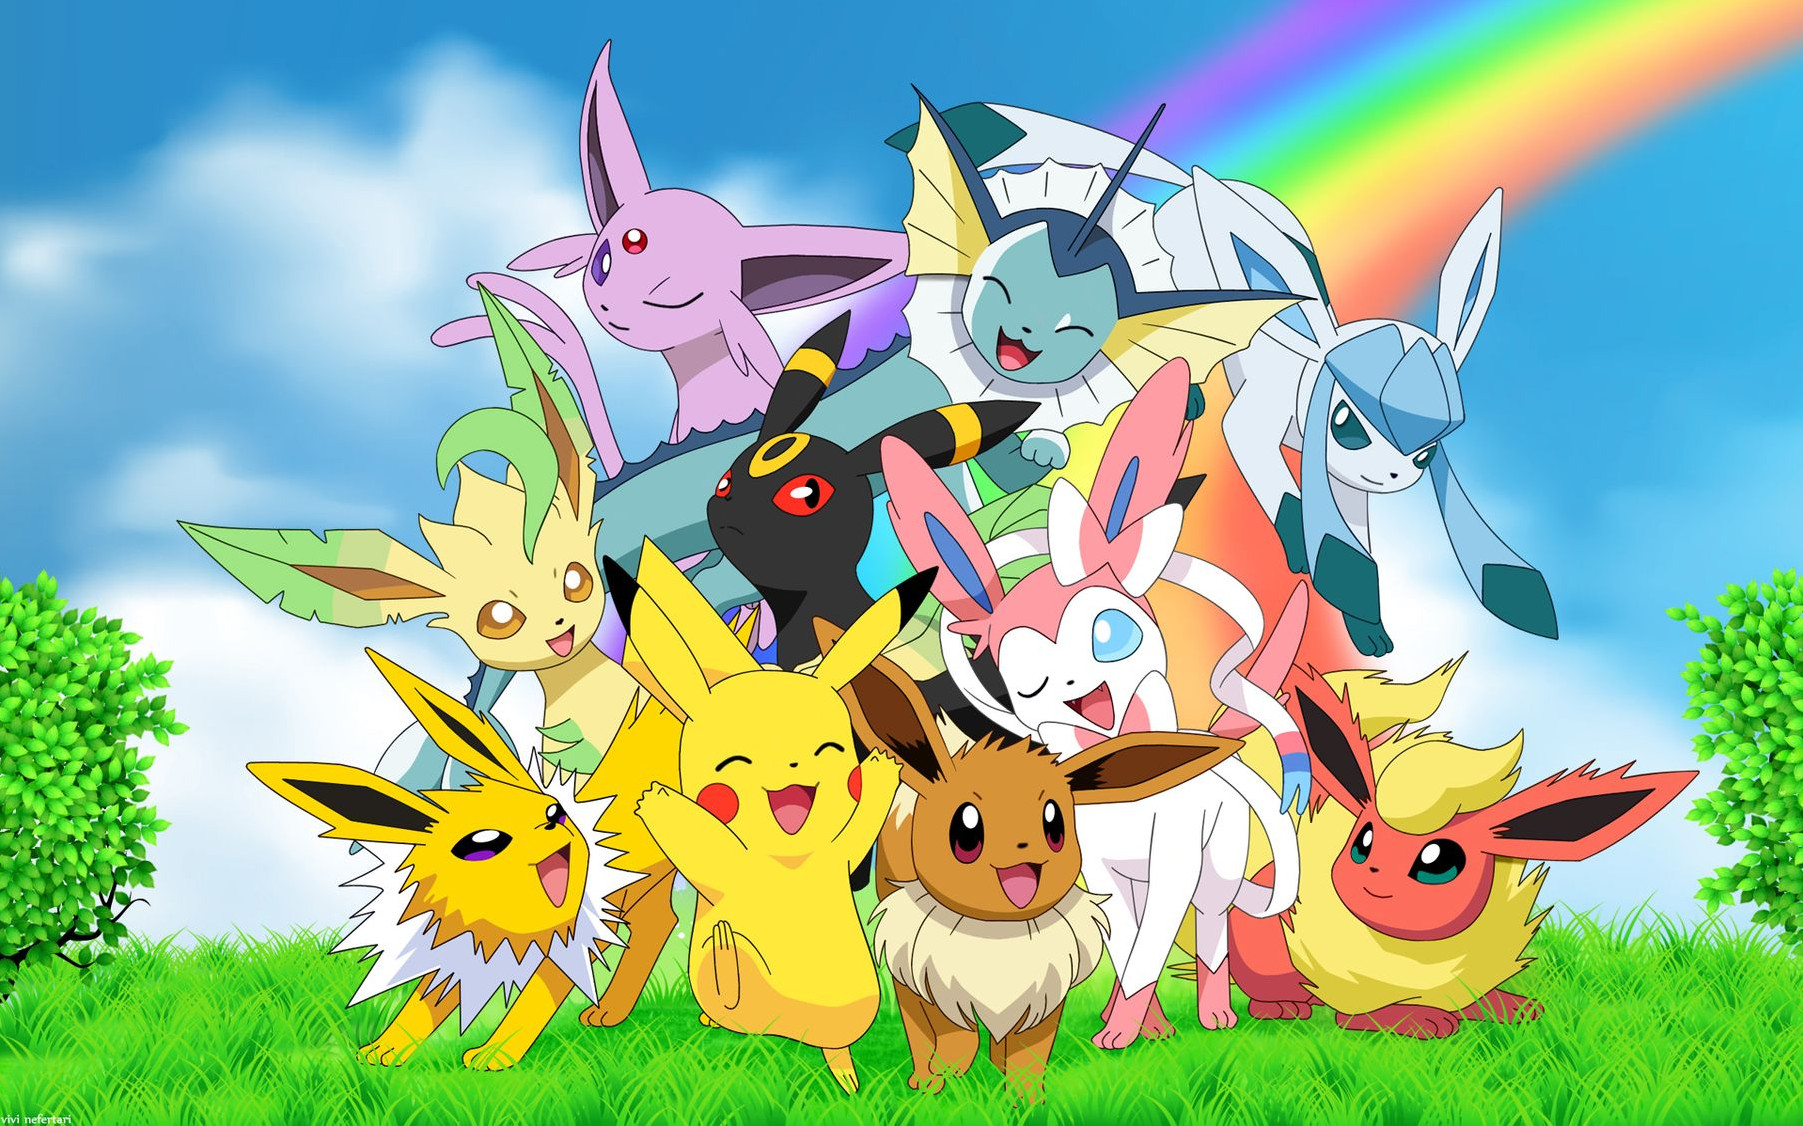


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool



In [ ]:
data = pd.read_csv('pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


**'#'** - Регистрационный номер покемона в Национальном Pokedex

**Name** - имя покемона

**Type 1** - у каждого покемона есть тип, который определяет слабость / устойчивость к атакам

**Type 2**- некоторые покемоны имеют два типа

**HP** - очки жизни, или здоровье, определяют, какой урон покемон может выдержать до потери сознания

**Attack** - базовая атака покемона

**Defense** - базовая защита покемонов

**Sp. Atk** - базовая специальная атака покемона

**Sp. Def** - базовая специальная защита покемона

**Speed** - скорость покемона

**Generation** - указывает, в какой группе / серии игр был выпущен покемон

**Legendary** - логическое значение, определяющее, является ли покемон легендарным

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
# показывает последние 5 строчек
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [ ]:
# количество строк и столбцов в датасете, размер датасета
data.shape

(800, 12)

In [ ]:
data.corr()

<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<ipython-input-18-f2ec148a7a11>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,ax=ax)


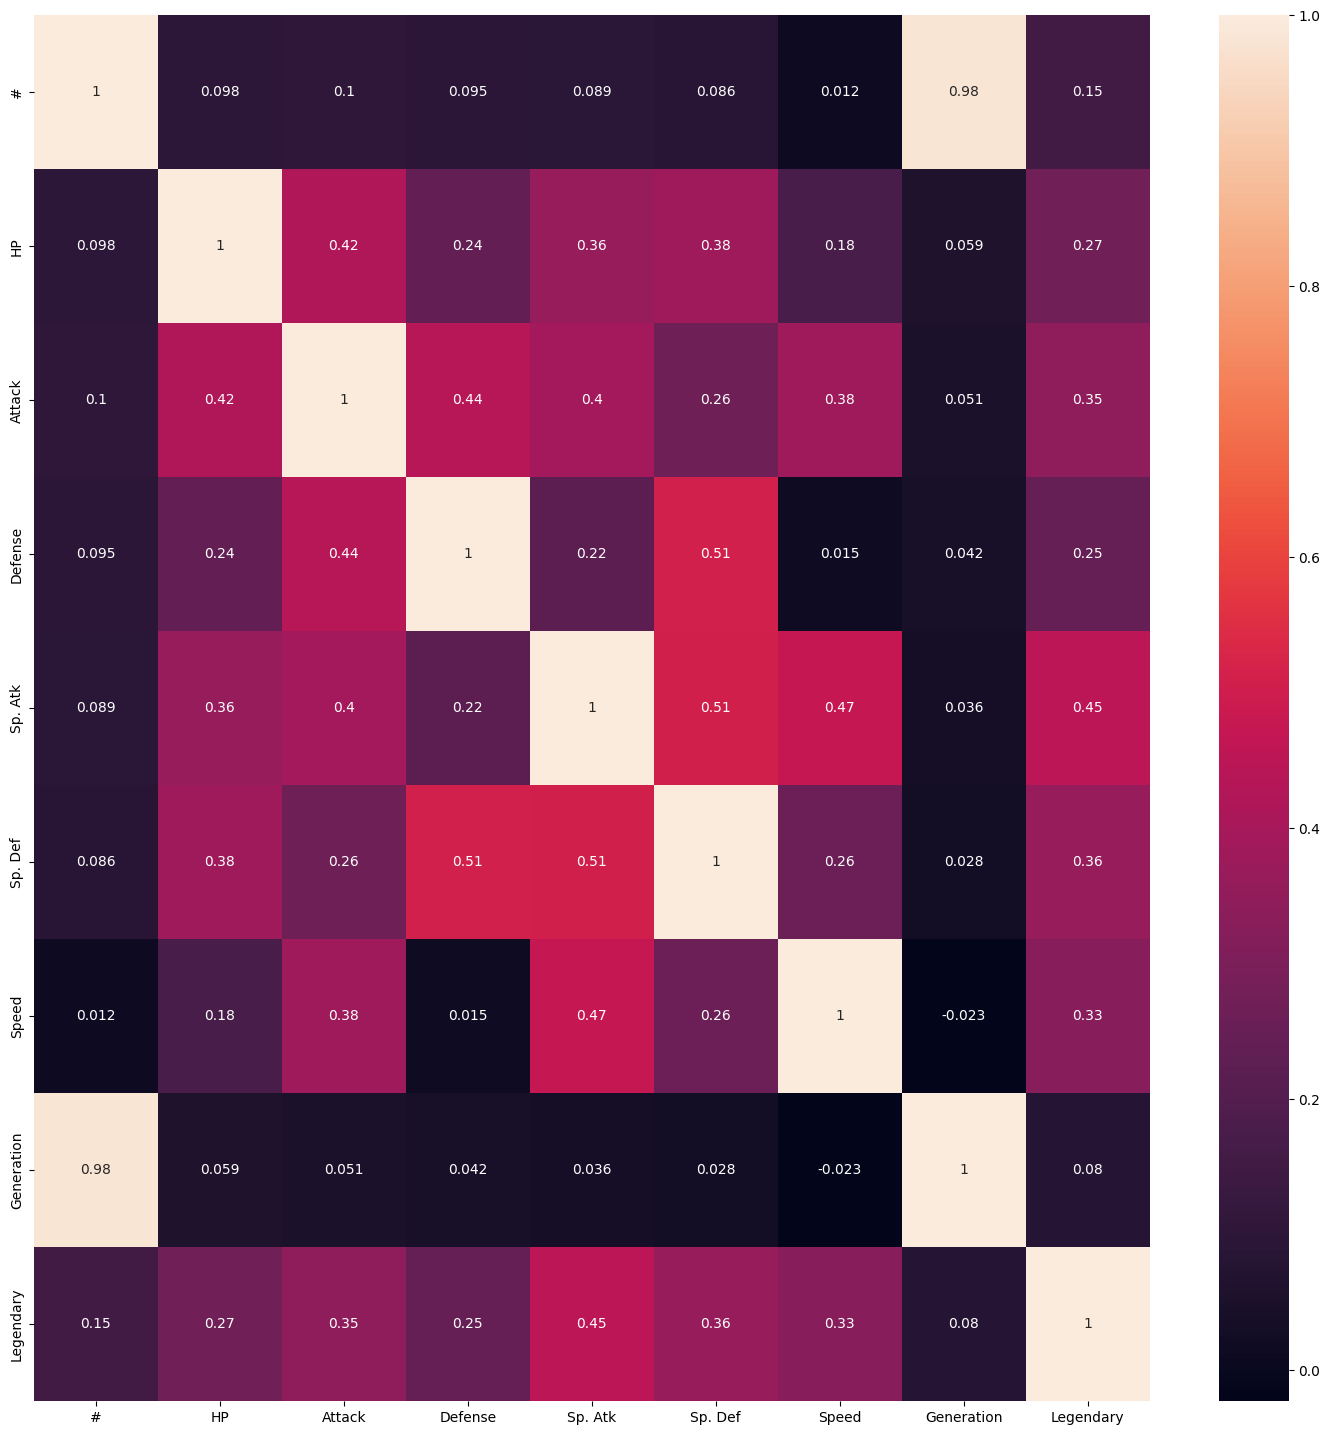

In [ ]:
#Матрица корреляции
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True,ax=ax)
plt.show()

In [ ]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### MATPLOTLIB

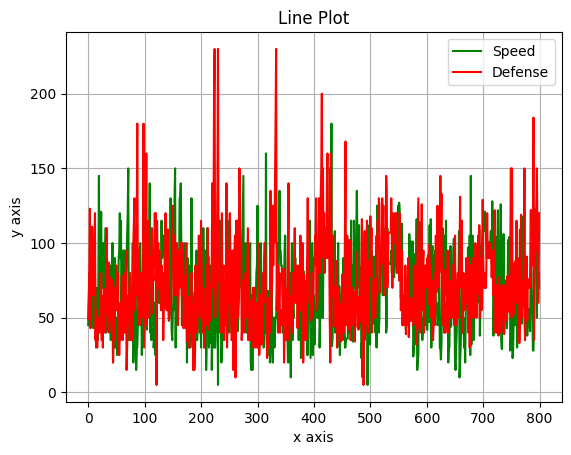

In [ ]:
# Line Plot
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed', grid = True)
data.Defense.plot(color = 'r',label = 'Defense', grid = True)

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

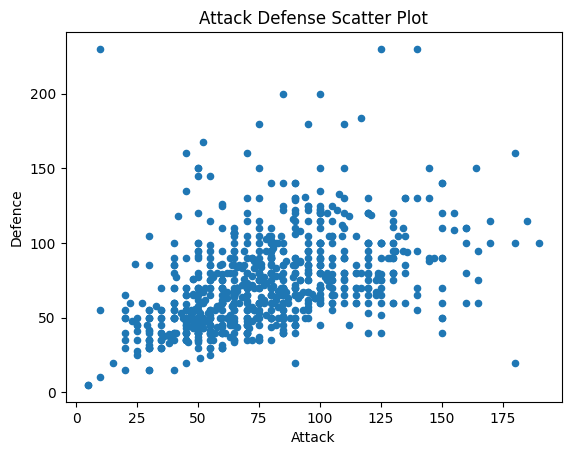

In [ ]:
# Scatter Plot
data.plot(kind='scatter', x='Attack', y='Defense')
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')

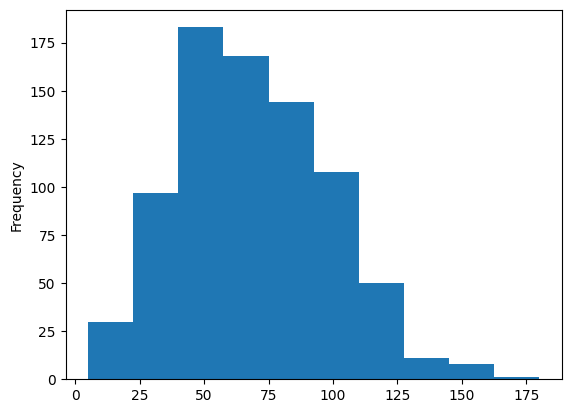

In [ ]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist')
plt.show()

<a id="4"></a> <br>
### PANDAS



In [ ]:
data = pd.read_csv('pokemon.csv')

In [ ]:
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Фильтрация данных
data[data['Defense']>200 ]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [ ]:
# Фильтрация данных
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [ ]:
# Фильтрация данных
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [ ]:
data = pd.read_csv('pokemon.csv')


<a id="18"></a> <br>
### Анализ данных
Мы будем использовать метод describe(). Описанный метод включает в себя:
* count: количество записей
* mean: среднее значение записей
* std: стандартное отклонение
* min: минимальная запись
* 25%: первый квантиль
* 50%: медиана или второй квантиль
* 75%: третий квантиль
* max: максимальная запись

<br> Что такое квантиль?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* Медиана - это число, которое находится в середине последовательности. В данном случае это было бы 11.

* Нижний квартиль - это медиана между наименьшим числом и медианой, т.е. между 1 и 11, что равно 6.
* Верхний квартиль, вы находите медиану между медианой и наибольшим числом, т.е. между 11 и 17, что будет равно 14 в соответствии с вопросом ab.

In [ ]:
# Давайте посмотрим на частоту встречаемости покемонов
print(data['Type 1'].value_counts(dropna =False))


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [ ]:
# Например, максимальный HP равен 255 или минимальная защита равна 5
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<Axes: title={'center': 'Attack'}, xlabel='Legendary'>

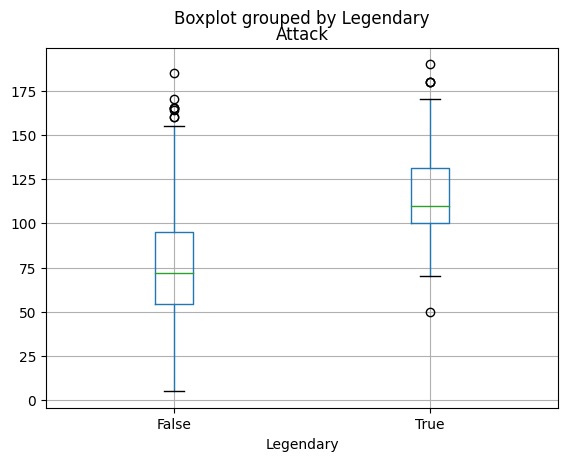

In [ ]:
# Например: сравните атаку покемонов, которые являются легендарными или нет
# Черная линия вверху - максимальная
# Синяя линия вверху - 75%
# Зеленая линия - средняя (50%)
# Синяя линия внизу - 25%
# Черная линия внизу - минимальная
# Нет никаких выбросов
data.boxplot(column='Attack',by = 'Legendary')

<a id="20"></a> <br>
### Как привести данные в порядок


In [ ]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [ ]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [ ]:
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [ ]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


<a id="23"></a> <br>
### DATA TYPES


In [ ]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [ ]:
# позволяет преобразовать object(str) в categorial, а int - в float.data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [ ]:
data.dtypes

#               int64
Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed         float64
Generation      int64
Legendary        bool
dtype: object

<a id="24"></a> <br>
### Пропущенные значения
Если мы столкнемся с отсутствующими данными, что мы можем сделать:
* оставить как есть
* удалить их с помощью dropna()
* заполнить пропущенное значение с помощью fillna()
* заполнить пропущенные значения тестовой статистикой, такой как среднее значение


In [ ]:
# Давайте посмотрим, имеют ли данные о покемонах значение nan
# Как вы можете видеть, здесь 800 записей. Однако тип 2 имеет 414 ненулевых объектов, поэтому у него 386 нулевых объектов.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #           800 non-null    int64  
 1   Name        799 non-null    object 
 2   Type 1      800 non-null    object 
 3   Type 2      414 non-null    object 
 4   HP          800 non-null    int64  
 5   Attack      800 non-null    int64  
 6   Defense     800 non-null    int64  
 7   Sp. Atk     800 non-null    int64  
 8   Sp. Def     800 non-null    int64  
 9   Speed       800 non-null    float64
 10  Generation  800 non-null    int64  
 11  Legendary   800 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 69.7+ KB


In [ ]:
# Давайте посмотрим на Type 2
data["Type 2"].value_counts(dropna =False)
# 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
# Давайте удалим пропущенные значения
data1=data # также мы будем использовать данные для заполнения недостающего значения, поэтому я присваиваю его переменной data1
data1.dropna(inplace = True)
data1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50.0,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110.0,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70.0,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80.0,6,True


In [ ]:
# Assert statement:
assert 1==1 # return nothing because it is true

In [ ]:
assert  data1['Type 2'].notnull().all() # returns nothing because we drop nan values

In [ ]:
data["Type 2"].fillna('empty',inplace = True)


In [ ]:
assert  data['Type 2'].notnull().all() # returns nothing because we do not have nan values

<a id="28"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuble): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

In [ ]:
# Plotting all data
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()


In [ ]:
# subplots
data1.plot(subplots = True)
plt.show()

In [ ]:
# scatter plot
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

In [ ]:
# hist plot
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250))

In [ ]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt